# Task 2- Iris Flower Classification

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [44]:
#read Iris Dataset
df = pd.read_csv("Iris.csv")

In [45]:
df.head(25)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [46]:
#Calculates the mean, std, min,max
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
#Finding the shape of the dataset
df.shape

(150, 6)

In [8]:
type(df)
df.info


<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [48]:
# Finding the count of each species
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [50]:
df.drop("Id",axis=1,inplace=True)

# Lets visualise the DataSet

In [10]:
#PairPlot

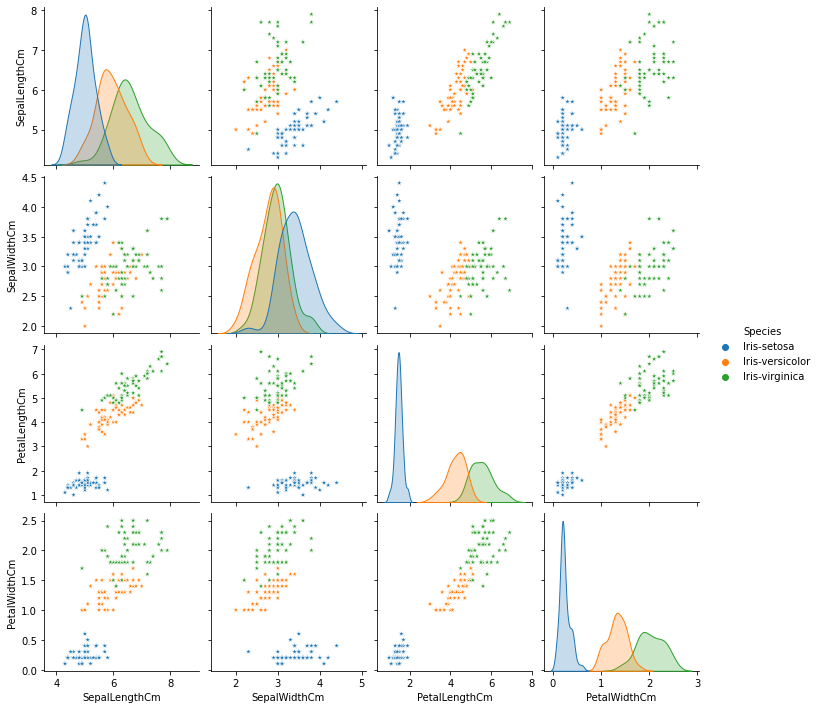

In [51]:

sns.pairplot(df,hue='Species',markers='*')

In [52]:
%matplotlib inline

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

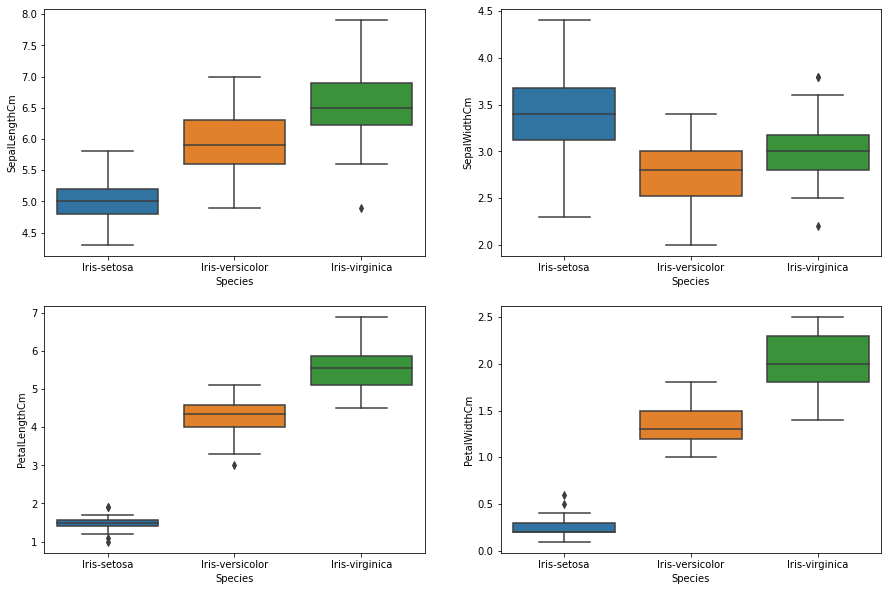

In [53]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1) 
sns.boxplot(x='Species',y='SepalLengthCm',data =df)
#plt.show()
plt.subplot(2,2,2) 
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
#plt.show()
plt.subplot(2,2,3) 
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
#plt.show()
plt.subplot(2,2,4) 
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
#plt.show()


<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

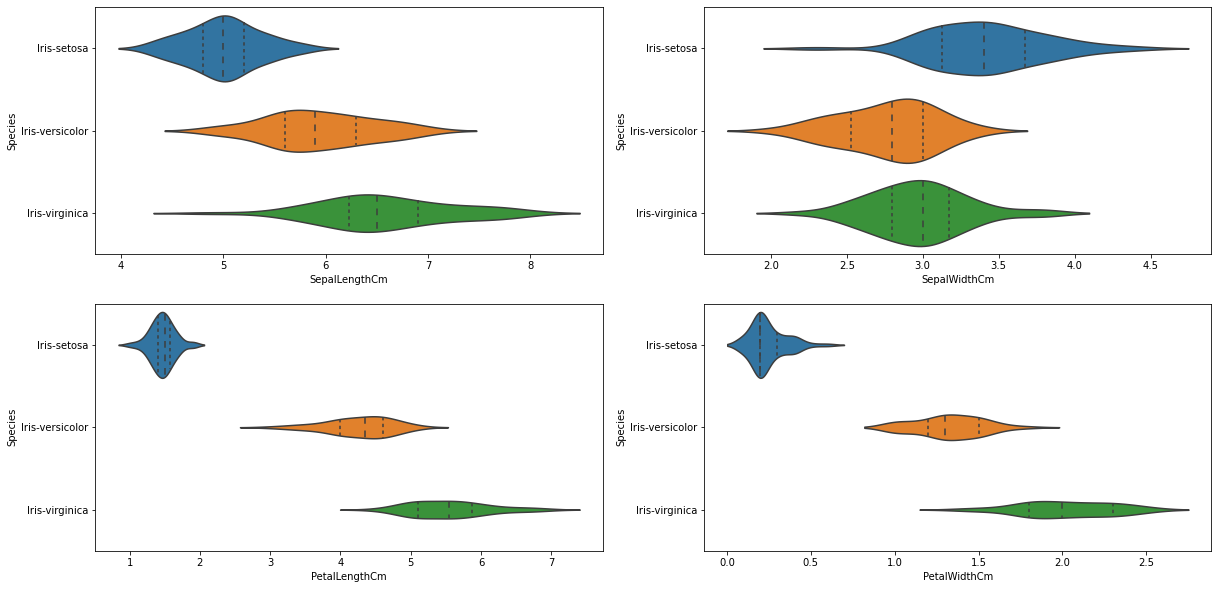

In [14]:
#Violin Plot
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.violinplot(x='SepalLengthCm', y='Species',data=df, inner='quartile')
plt.subplot(2,2,2)
sns.violinplot(x='SepalWidthCm', y='Species',data=df, inner='quartile')
plt.subplot(2,2,3)
sns.violinplot(x='PetalLengthCm', y='Species',data=df, inner='quartile')
plt.subplot(2,2,4)
sns.violinplot(x='PetalWidthCm', y='Species',data=df, inner='quartile')



In [54]:
#finding the datatype
df.dtypes


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<AxesSubplot:>

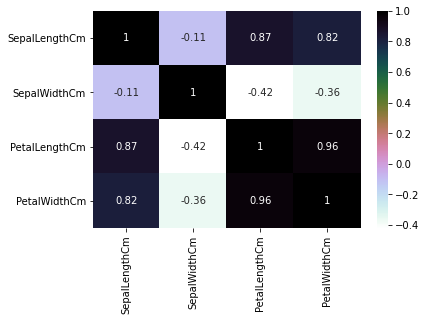

In [55]:
sns.heatmap(df.corr(),annot = True,cmap='cubehelix_r')

# Splitting the dataset

In [71]:
train,test = train_test_split(df,test_size= 0.33)
print(train.shape)
print(test.shape)


(100, 5)
(50, 5)


In [72]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [73]:
print(X_train.shape)
X_train.head()

(100, 4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
28,5.2,3.4,1.4,0.2
146,6.3,2.5,5.0,1.9
32,5.2,4.1,1.5,0.1
34,4.9,3.1,1.5,0.1


In [74]:
print(y_train.shape)
y_train.head()

(100,)


8         Iris-setosa
28        Iris-setosa
146    Iris-virginica
32        Iris-setosa
34        Iris-setosa
Name: Species, dtype: object

In [75]:
print(X_test.shape)
X_test.head()

(50, 4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
110,6.5,3.2,5.1,2.0
50,7.0,3.2,4.7,1.4
135,7.7,3.0,6.1,2.3
81,5.5,2.4,3.7,1.0


In [76]:
print(y_test.shape)
y_test.head()

(50,)


95     Iris-versicolor
110     Iris-virginica
50     Iris-versicolor
135     Iris-virginica
81     Iris-versicolor
Name: Species, dtype: object

# Logistic Regression

In [77]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
prediction = lg.predict(X_test)

In [80]:
metrics.accuracy_score(prediction,y_test)

0.96

# Decision Tree Classifier

In [81]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_predict = DT.predict(X_test)

In [82]:
metrics.accuracy_score(DT_predict,y_test)

0.94

# K Nearest Neighbour

In [83]:
NN = KNeighborsClassifier()
NN.fit(X_train,y_train)
NN_predict = NN.predict(X_test)

In [84]:
metrics.accuracy_score(NN_predict,y_test)

0.98

# Support Vector Machine

In [86]:
SV_model= svm.SVC()
SV_model.fit(X_train,y_train)
SV_predict = SV_model.predict(X_test)

In [87]:
metrics.accuracy_score(SV_predict,y_test)

0.92

# K Nearest Neigbour model have more accuracy